In [65]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset from CSV file
# Replace file.csv
data = pd.read_csv('file.csv')


In [66]:
# Separate loan providers from features
loan_providers = data['Loan Providers'].tolist()
X = data.drop(columns=['Loan Providers'])

# Use Expenses FY19, FY20, FY21, FY22, FY23 as features
X_train, X_test = X.iloc[:, :-2], X.iloc[:, :-2]

# Use Expenses FY24 as the target variable
y_train, y_test = X.iloc[:, -1], X.iloc[:, -1]

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [67]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).reshape(-1, 1)

# Define the linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.linear(x)

# Instantiate the model
input_size = X_train_tensor.shape[1]
model = LinearRegressionModel(input_size)

# Defines the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss value during training
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [1/100], Loss: 1117726848.0000
Epoch [2/100], Loss: 1052377088.0000
Epoch [3/100], Loss: 992529088.0000
Epoch [4/100], Loss: 937638784.0000
Epoch [5/100], Loss: 887220352.0000
Epoch [6/100], Loss: 840838656.0000
Epoch [7/100], Loss: 798104704.0000
Epoch [8/100], Loss: 758670144.0000
Epoch [9/100], Loss: 722223104.0000
Epoch [10/100], Loss: 688484160.0000
Epoch [11/100], Loss: 657202560.0000
Epoch [12/100], Loss: 628153728.0000
Epoch [13/100], Loss: 601135808.0000
Epoch [14/100], Loss: 575967552.0000
Epoch [15/100], Loss: 552486208.0000
Epoch [16/100], Loss: 530545280.0000
Epoch [17/100], Loss: 510012896.0000
Epoch [18/100], Loss: 490770496.0000
Epoch [19/100], Loss: 472710784.0000
Epoch [20/100], Loss: 455737248.0000
Epoch [21/100], Loss: 439762720.0000
Epoch [22/100], Loss: 424708096.0000
Epoch [23/100], Loss: 410502240.0000
Epoch [24/100], Loss: 397080352.0000
Epoch [25/100], Loss: 384383712.0000
Epoch [26/100], Loss: 372359168.0000
Epoch [27/100], Loss: 360958208.0000
Epoch [2

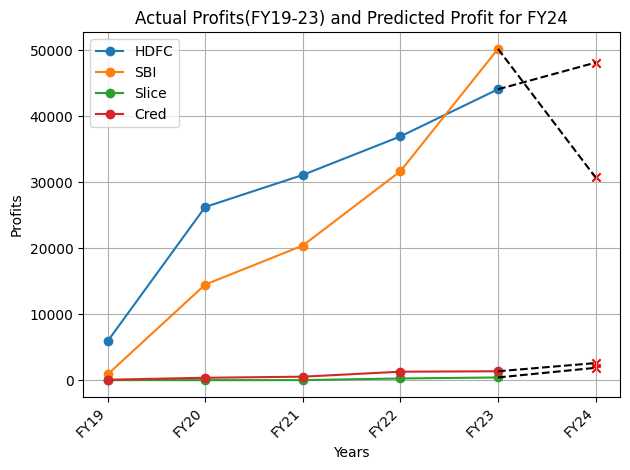


Loan Provider: HDFC
Actual Expenses:
Year	Expense
FY19	1.7153188513179767
FY20	1.4633602237884793
FY21	1.3610291503405196
Predicted Expense for FY24: 48157.156

Loan Provider: SBI
Actual Expenses:
Year	Expense
FY19	-0.34566179328555974
FY20	0.3856081838094708
FY21	0.5560672735369667
Predicted Expense for FY24: 30733.795

Loan Provider: Slice
Actual Expenses:
Year	Expense
FY19	-0.6952911927970191
FY20	-0.9409325755306016
FY21	-0.9780352589521196
Predicted Expense for FY24: 1870.1757

Loan Provider: Cred
Actual Expenses:
Year	Expense
FY19	-0.6743658652353978
FY20	-0.908035832067349
FY21	-0.939061164925367
Predicted Expense for FY24: 2588.7424


Loan Providers   FY19    FY20    FY21    FY22    FY23    FY24 (Predicted)
HDFC            5885.10  26257.30 31116.50 36961.30 44109.00 48157.16
SBI             862.00   14488.00 20410.00 31676.00 50232.00 30733.79
Slice           9.87     1.87     5.47     254.00   406.00   1870.18 
Cred            60.87    361.11   523.85   1279.50  1347.00  258

In [69]:

# Evaluate the model
with torch.no_grad():
    y_pred = model(X_test_tensor)

# Convert tensors to numpy arrays
y_test_array = y_test_tensor.numpy().flatten()
y_pred_array = y_pred.numpy().flatten()

print()

# Plot actual values for FY19 to FY23
for i, provider in enumerate(loan_providers):
    expenses = X.iloc[i, :].values  # Get expenses for the current loan provider, including FY23
    x_values = range(len(expenses))  # Adjust range to include FY23
    plt.plot(x_values, expenses, marker='o', label=provider)  # Use original unscaled values from the dataset

# Plot predicted values for FY24
for i, provider in enumerate(loan_providers):
    plt.scatter(len(X.columns), y_pred_array[i], marker='x', color='red')  # Plot predicted value for FY24
    # Join FY23 and FY24 with a dotted line
    plt.plot([len(X.columns)-1, len(X.columns)], [X.iloc[i, -1], y_pred_array[i]], linestyle='--', color='black')

# Set x-axis ticks and labels
plt.xticks(range(len(X.columns) + 1), list(X.columns) + ['FY24'], rotation=45, ha='right')
plt.xlabel('Years')
plt.ylabel('Profits')
plt.title('Actual Profits(FY19-23) and Predicted Profit for FY24')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print()
# Print all the plotted values
for i, loan_provider in enumerate(loan_providers):
    print(f'Loan Provider: {loan_provider}')
    print('Actual Expenses:')
    print('Year\tExpense')
    for year, expense in zip(X.columns[:-1], X_test[i]):
        print(f'{year}\t{expense}')
    print('Predicted Expense for FY24:', y_pred_array[i])
    print()  # Add a newline for better readability







print()


# Print loan providers, actual, and predicted values
print("Loan Providers   FY19    FY20    FY21    FY22    FY23    FY24 (Predicted)")
for i, loan_provider in enumerate(loan_providers):
    actual_values = X.iloc[i, :].values  # Include FY23
    predicted_value = y_pred_array[i]
    print(f"{loan_provider:<15} {' '.join([f'{value:<8.2f}' for value in actual_values])} {predicted_value:<8.2f}")




print()
